In [3]:
import numpy as np
from random import seed 
from random import random
from random import sample
from typing import List
import math

In [4]:
# def const
Q = 100 # cte
n = 30 # nombre de ville
m = n #nombre de fourmis
C = 0.001 # qté de pheromone initiale
RO = 0.5 # coefficient d'evaporation
ALPHA = 1 #cte
BETA = 5 #cte
NCmax = 2000 # nombre maximale d'itération

In [5]:
# class ant
class Ant:
    allcities = [i for i in range(n)]
    
    def __init__(self,current_city):
        self.current_city = current_city
        self.visited_cities = []*0
    
    def get_currentCity(self):
        return self.current_city
    
    def get_visitedCities(self):
        return self.visited_cities
    
    def addCity(self,c):
        self.visited_cities.append(c)
        
    def move(self,c):
        self.current_city=c
        self.visited_cities.append(c)


In [6]:
# list of ants
ants = []
# intitialisation des phéromones
phers = []
for i in range(n):
    pe = []
    for j in range(n):
        pe.append(C)
    phers.append(pe)

# coordonnées des villes
def generatevilles(n):
    L = []
    seed(1)
    for i in range(n):
        x = random()*2000
        y = random()*2000
        L.append([x,y])
    L=np.array(L)
    return L

# distances entre les villes
def calculateDistances(L):
    D = []
    for i in range(n):
        dLine = []
        for j in range(n):
            x = L[i][0] - L[j][0]
            y = L[i][1] - L[j][1]
            dLine.append(math.sqrt(pow(x,2)+pow(y,2)))
        D.append(dLine)
    return D

# distribution des fourmies entre les villes
def distributeAnts(ants : []):
    #generate list of ints non ordonée
    smpl = sample(range(n),n)
    for i in range(n) : 
        ant = Ant(smpl[i])
        ant.addCity(smpl[i])
        ants.append(ant)
    return

# visibilité 
def claculateVisibilite(L):
    V = []
    for i in range(n):
        dLine = []
        for j in range(n):
            x = L[i][0] - L[j][0]
            y = L[i][1] - L[j][1]
            dis = math.sqrt(pow(x,2)+pow(y,2))
            if dis == 0:
                dLine.append(0)
            else : 
                dLine.append(1/dis)
        V.append(dLine)
    return V
    

villes =  generatevilles(n)
  
distances = calculateDistances(villes)

visibilite = claculateVisibilite(villes)

distributeAnts(ants)


In [7]:
# opération sur les fourmies
#somme des visibilités et pheromones
def sommePherVis(Pher,Vis,alpha,beta,ant:Ant):
    somme = 0
    noneVisitedCities = set(ant.allcities).difference(set(ant.get_visitedCities()))
    noneVisitedCities = list(noneVisitedCities)
    for i in range(len(noneVisitedCities)):
        somme = somme+ (pow(Pher[ant.get_currentCity()][noneVisitedCities[i]],alpha))*(pow(Vis[ant.get_currentCity()][noneVisitedCities[i]],beta))
    return somme
    
# probabilité
def probabilites(Pher, Vis, alpha,beta,ant:Ant):
    probas = []
    # vlls sont les villes pas encore parcourus
    vlls = list(set(ant.allcities).difference(set(ant.get_visitedCities())))
    denomminateur = sommePherVis(phers,visibilite,ALPHA,BETA,ant)
    for i in range(len(vlls)):
        p = (pow(Pher[ant.get_currentCity()][vlls[i]],alpha))*(pow(Vis[ant.get_currentCity()][vlls[i]],beta))/denomminateur
        # maintenant on a la liste des probas 
        probas.append(p)
    # on retourne l'indice de la proba maximale
    return probas

# best ville
def villeMaxProba(Pher, Vis, alpha,beta,ant:Ant):
    p = probabilites(Pher, Vis, alpha,beta,ant)
    max_index = np.argmax(p)
    # list des villes non encore visitée
    vlls = list(set(ant.allcities).difference(set(ant.get_visitedCities())))
    return vlls[max_index]

In [8]:
# Moving Ants
# Cycle 1 :
def moveAntOnce(ants: [],Pher, Vis, alpha,beta):
    for i in range(n):
        ville = villeMaxProba(Pher, Vis, alpha,beta,ants[i])
        ants[i].move(ville)
    

# mise à jour des pheromones
def evaporation(Pher,ro):
    phern=[]
    for i in range(n):
        pe = []
        for j in range(n):
            pe.append(Pher[i][j]*ro)
        phern.append(pe)
    return phern

def longueurTrajet(ant : Ant,distances):
    l = 0
    for i in range(len(ant.get_visitedCities())-1):
        l += distances[ant.get_visitedCities()[i]][ant.get_visitedCities()[i+1]]
    l += distances[ant.get_visitedCities()[0]][ant.get_visitedCities()[len(ant.get_visitedCities())-1]] 
    return l

def updatePheromone(ants:[], Pher, ro,distances): 
    Pher = evaporation(Pher,ro)
    for i in range(m):
        L = longueurTrajet(ants[i],distances)
        newPher = Q / L
        for k in range(len(ants[i].get_visitedCities())-1):
            Pher[ants[i].get_visitedCities()[k]][ants[i].get_visitedCities()[k+1]] += newPher
            Pher[ants[i].get_visitedCities()[k+1]][ants[i].get_visitedCities()[k]] += newPher
            
        Pher[ants[i].get_visitedCities()[0]][ants[i].get_visitedCities()[len(ants[i].get_visitedCities())-1]] += newPher
        Pher[ants[i].get_visitedCities()[len(ants[i].get_visitedCities())-1]][ants[i].get_visitedCities()[0]] += newPher
    return Pher

        



    



In [9]:
#our main program func   
def moveAnts(ants : [],Pher , Vis , alpha , beta , ro , distances):
    for kk in range(NCmax):
        #initialise la liste des fourmies à chaque itération
        ants = []
        distributeAnts(ants)
        for i in range(n-1):
            moveAntOnce(ants,Pher, Vis, alpha,beta)
        Pher = updatePheromone(ants,Pher, ro,distances)
    for i in range(m):
        print(ants[i].get_visitedCities())
    return ants
    
ants = moveAnts(ants,phers,visibilite,ALPHA,BETA,RO,distances)

[3, 22, 24, 18, 5, 29, 23, 11, 1, 19, 6, 9, 2, 14, 27, 7, 25, 16, 12, 21, 28, 13, 4, 17, 15, 10, 0, 8, 26, 20]
[12, 16, 25, 14, 2, 27, 7, 3, 22, 24, 18, 5, 29, 23, 11, 1, 19, 6, 9, 17, 4, 13, 28, 21, 15, 10, 0, 8, 26, 20]
[29, 5, 18, 24, 22, 3, 7, 27, 14, 2, 25, 16, 12, 21, 28, 13, 4, 17, 15, 10, 0, 8, 26, 20, 23, 11, 1, 19, 6, 9]
[22, 3, 7, 27, 14, 2, 25, 16, 12, 21, 28, 13, 4, 17, 15, 10, 0, 8, 26, 20, 24, 18, 5, 29, 23, 11, 1, 19, 6, 9]
[19, 1, 11, 23, 5, 29, 18, 24, 22, 3, 7, 27, 14, 2, 25, 16, 12, 21, 28, 13, 4, 17, 15, 10, 0, 8, 26, 20, 9, 6]
[28, 13, 4, 17, 15, 21, 12, 16, 25, 14, 2, 27, 7, 3, 22, 24, 18, 5, 29, 23, 11, 1, 19, 6, 9, 26, 20, 8, 0, 10]
[27, 14, 2, 25, 16, 12, 21, 28, 13, 4, 17, 15, 10, 0, 8, 7, 3, 22, 24, 18, 5, 29, 23, 11, 1, 19, 6, 9, 26, 20]
[11, 23, 5, 29, 18, 24, 22, 3, 7, 27, 14, 2, 25, 16, 12, 21, 28, 13, 4, 17, 15, 10, 0, 8, 26, 20, 1, 19, 6, 9]
[23, 11, 5, 29, 18, 24, 22, 3, 7, 27, 14, 2, 25, 16, 12, 21, 28, 13, 4, 17, 15, 10, 0, 8, 26, 20, 1, 19, 6, 9]
[

In [10]:
# chemins 
chemins = []
for i in range(m-1):
    chemins.append(ants[i].get_visitedCities())
chemins
def get_distance(v1,v2):
    return distances[v1][v2]

def calculate_best(chemins):
    couts=[]
    for chemin in chemins:
        cout = 0
        for i in range(n-1):
            cout += distances[chemin[i]][chemin[i+1]]
        cout+= distances[chemin[0]][chemin[n-1]]
        couts.append(cout)
    return { 
                "chemin" : chemins[np.argmin(couts)],
                "cout" : couts[np.argmin(couts)]
           }

best = calculate_best(chemins)

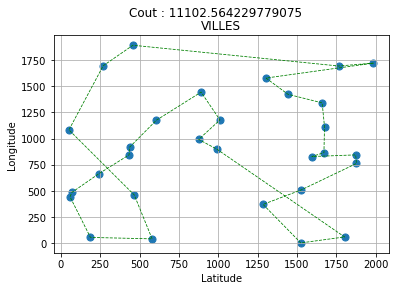

In [11]:
import matplotlib.pyplot as plt
# Plot nodes
ch = best["chemin"].copy()
ch.append(best["chemin"][0])


plt.scatter(villes[:,0],villes[:,1], marker='o', s=50)
plt.plot(villes[ch, 0], villes[ch, 1], c='g', linewidth=0.8, linestyle="--")

# Plot properties
plt.title("VILLES")
plt.suptitle("Cout : "+str(best['cout']))
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Show plot
plt.show()
plt.close()

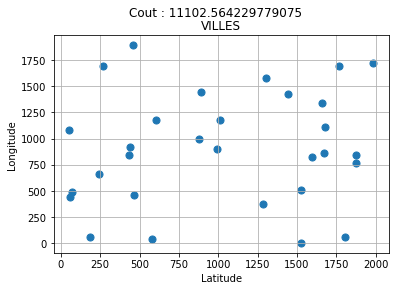

In [12]:
import matplotlib.pyplot as plt


plt.scatter(villes[:,0],villes[:,1], marker='o', s=50)

# Plot properties
plt.title("VILLES")
plt.suptitle("Cout : "+str(best['cout']))
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Show plot
plt.show()
plt.close()